# Exploratory Data Analysis - Mobile Price Classification

In [47]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Reading the dataset
df = pd.read_csv('train.csv')
df.shape

(2000, 21)

In [49]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [50]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [51]:
# Checking for missing values
print("Number of missing values in the dataset:",df.isnull().sum())

Number of missing values in the dataset: battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## Exploratory Data Analysis

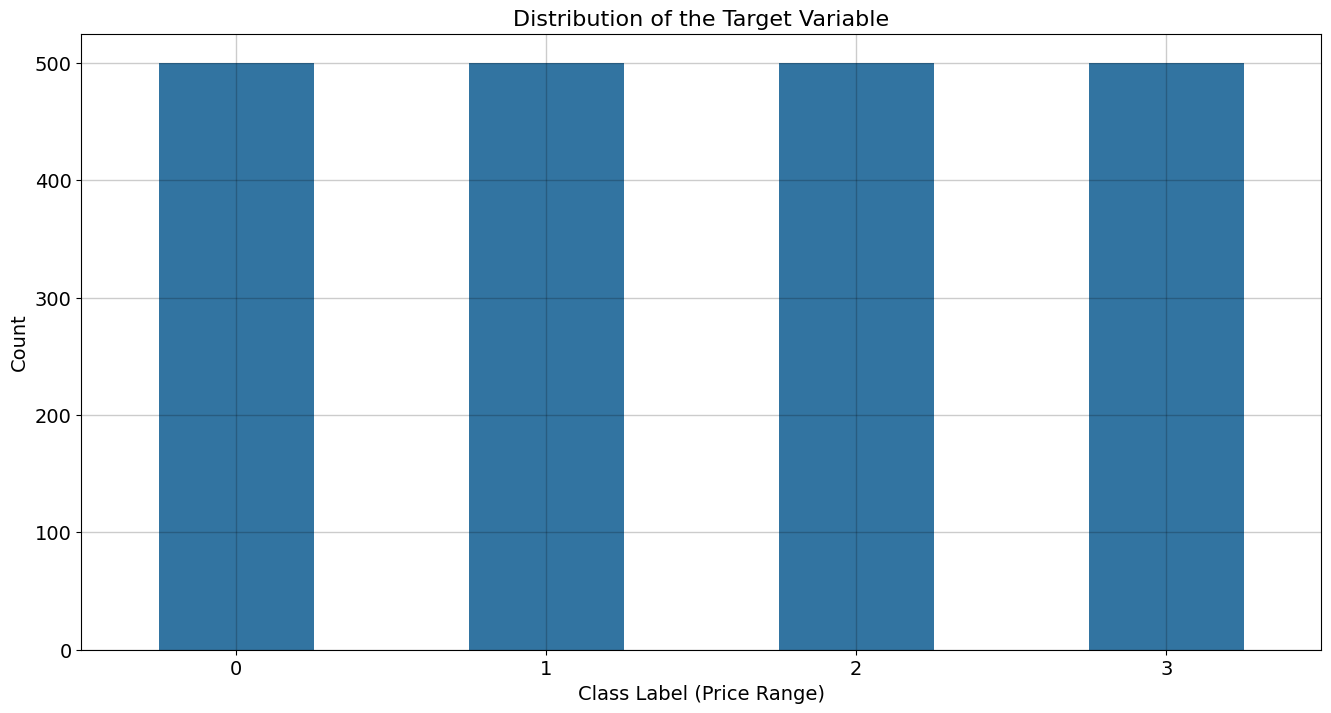

Number of Samples:
Class 0: 500 (25.0 %)
Class 1: 500 (25.0 %)
Class 2: 500 (25.0 %)
Class 3: 500 (25.0 %)


In [52]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(16,8))
sns.countplot(x=df['price_range'], data=df, width=0.5)
plt.title('Distribution of the Target Variable',color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

per_cl1 = round(len(df[df['price_range'] == 0])*100 / len(df), 3) 
per_cl2 = round(len(df[df['price_range'] == 1])*100 / len(df), 3) 
per_cl3 = round(len(df[df['price_range'] == 2])*100 / len(df), 3) 
per_cl4 = round(len(df[df['price_range'] == 3])*100 / len(df), 3) 

print('Number of Samples:')
print('Class 0:',len(df[df['price_range'] == 0]),'('+str(per_cl1)+' %)')
print('Class 1:',len(df[df['price_range'] == 1]),'('+str(per_cl2)+' %)')
print('Class 2:',len(df[df['price_range'] == 2]),'('+str(per_cl3)+' %)')
print('Class 3:',len(df[df['price_range'] == 3]),'('+str(per_cl4)+' %)')

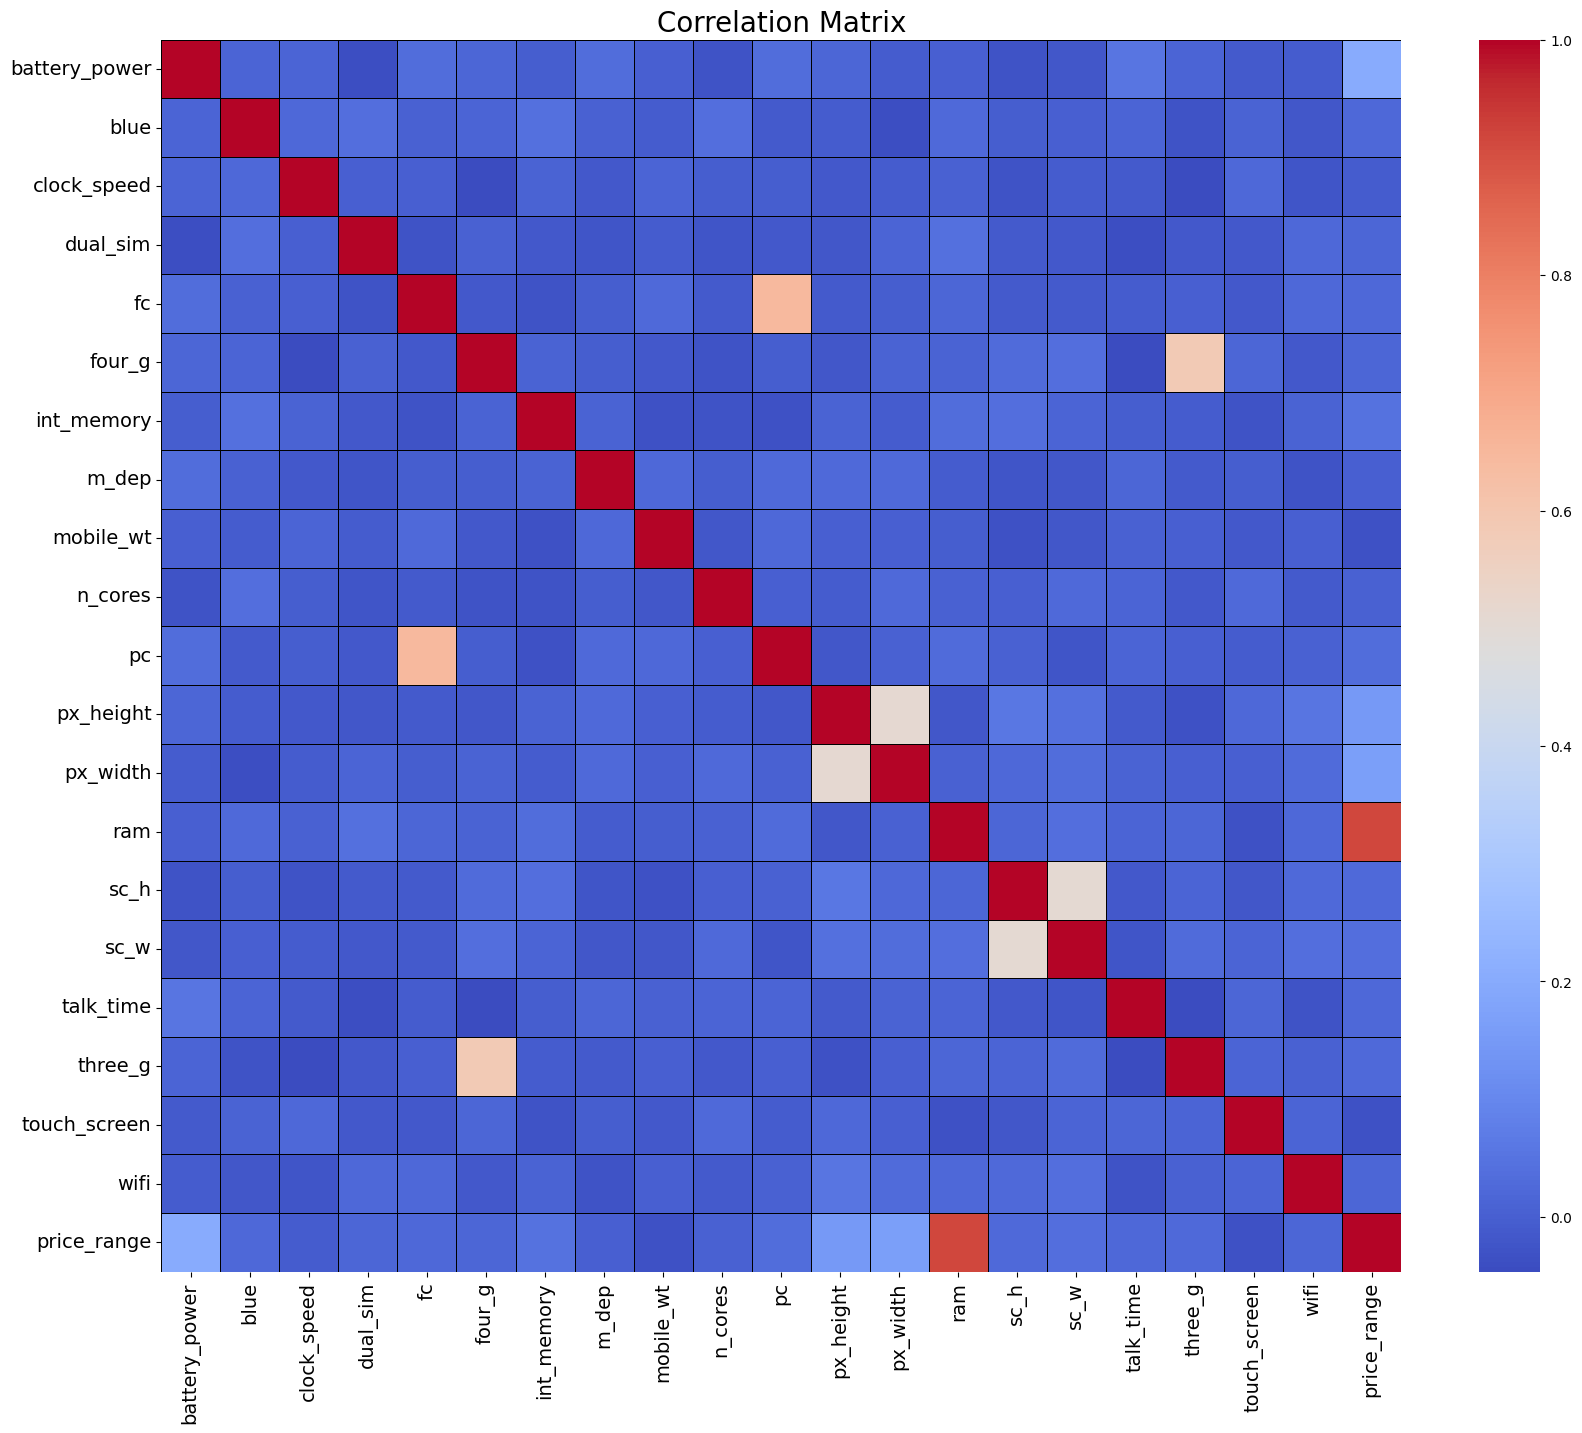

Top 10 correlations:
('price_range', 'ram'): 0.9170457362649902
('ram', 'price_range'): 0.9170457362649902
('pc', 'fc'): 0.6445952827956328
('fc', 'pc'): 0.6445952827956328
('three_g', 'four_g'): 0.5842455634172913
('four_g', 'three_g'): 0.5842455634172913
('px_width', 'px_height'): 0.5106644191393148
('px_height', 'px_width'): 0.5106644191393148
('sc_h', 'sc_w'): 0.5061442083433548
('sc_w', 'sc_h'): 0.5061442083433548


In [53]:
# Computing and plotting the correlation matrix
corr = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', color='black', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

corr_unstacked = corr.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Get the top 10 correlations by absolute value
top_10_corr = corr_unstacked.sort_values(ascending=False).head(10)

# Print the top 10 correlations with their actual values
top_10_corr_with_values = [(index, corr_unstacked[index]) for index in top_10_corr.index]
print("Top 10 correlations:")
for (col_pair, value) in top_10_corr_with_values:
    print(f"{col_pair}: {value}")

### Violin Plots for Visualizing Distribution of Data Across Different Classes (Numerical Features)

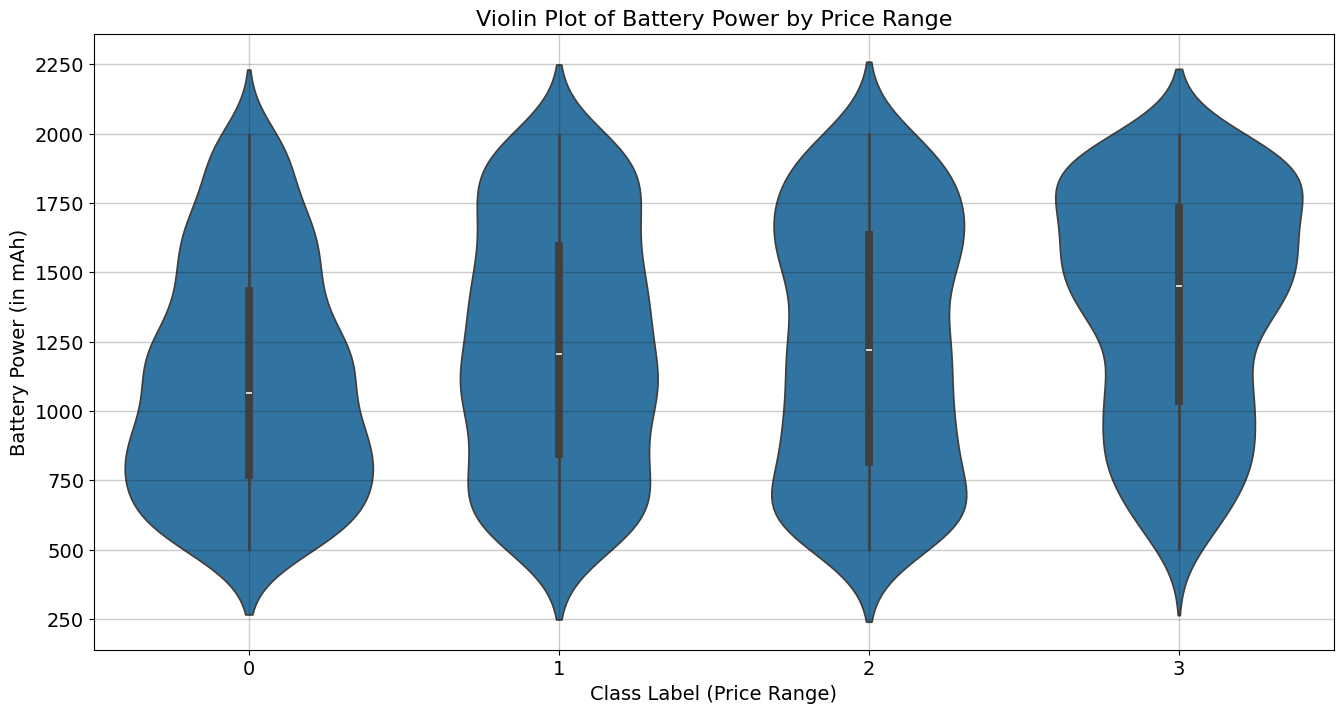

In [54]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title('Violin Plot of Battery Power by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Battery Power (in mAh)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

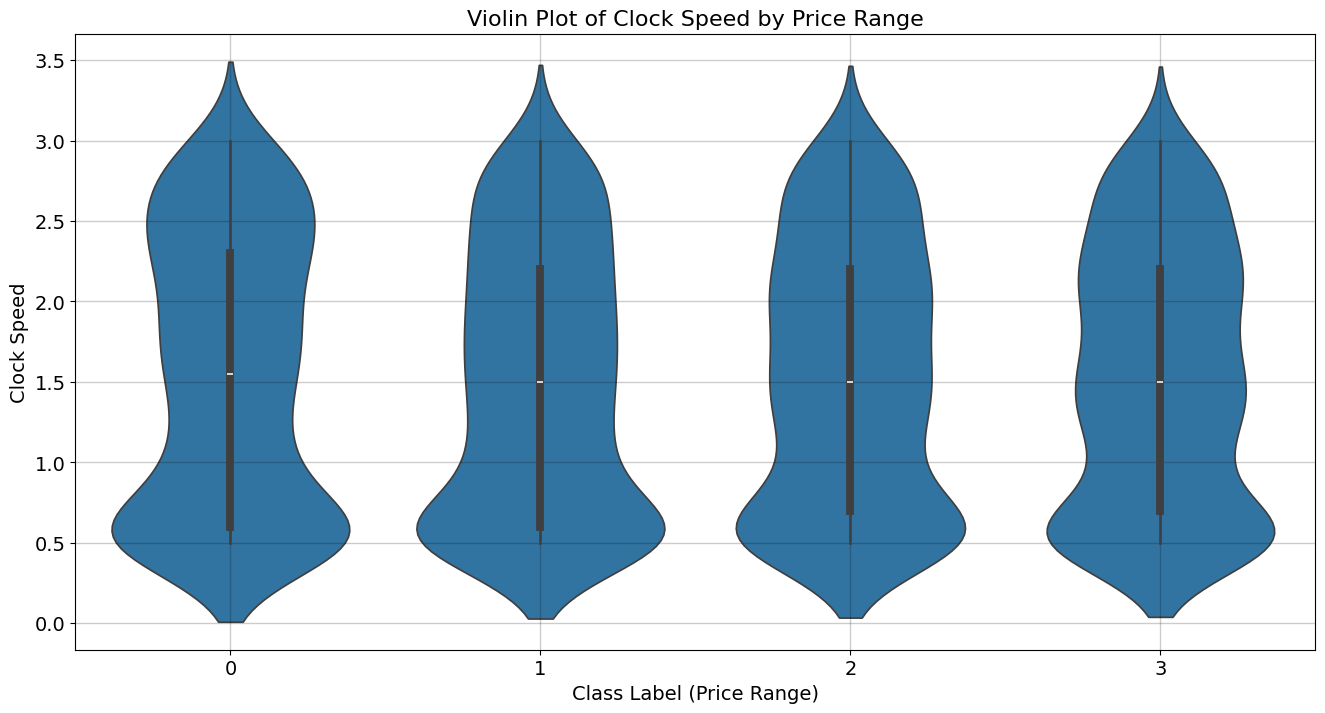

In [55]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='clock_speed', data=df)
plt.title('Violin Plot of Clock Speed by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Clock Speed', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

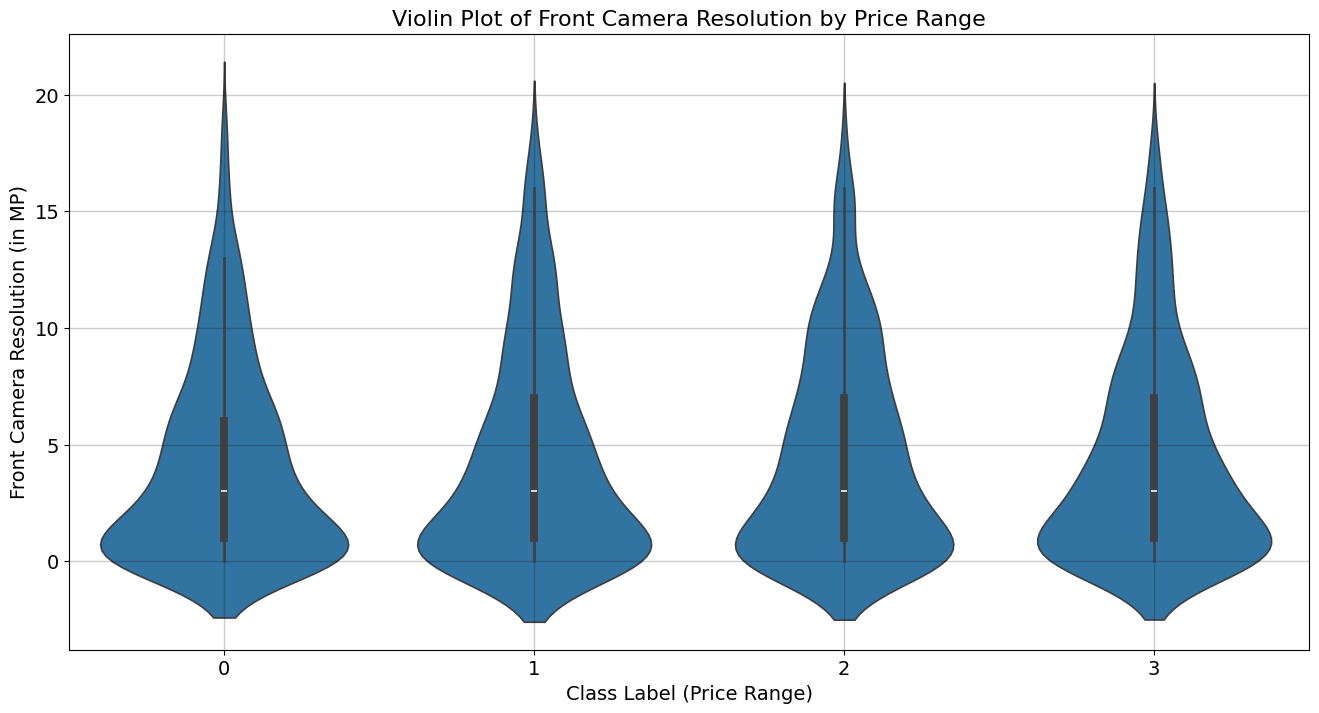

In [56]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='fc', data=df)
plt.title('Violin Plot of Front Camera Resolution by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Front Camera Resolution (in MP)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

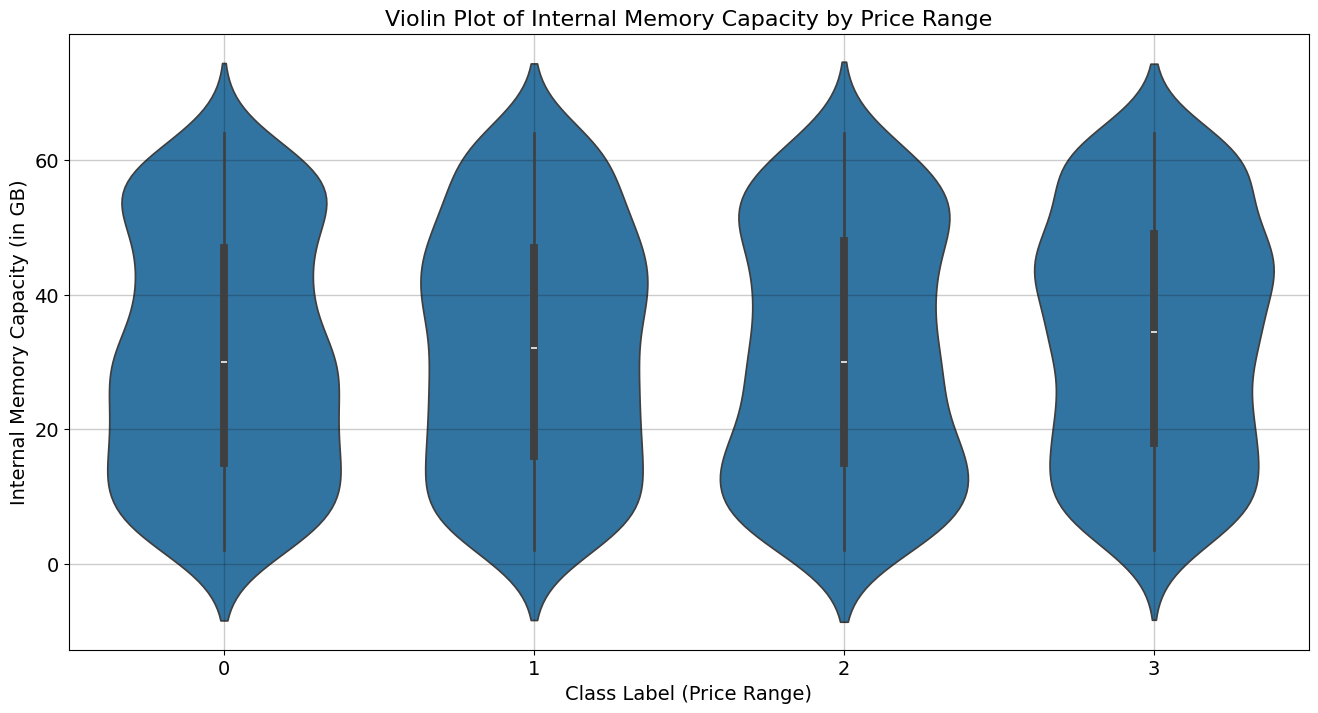

In [57]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='int_memory', data=df)
plt.title('Violin Plot of Internal Memory Capacity by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Internal Memory Capacity (in GB)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

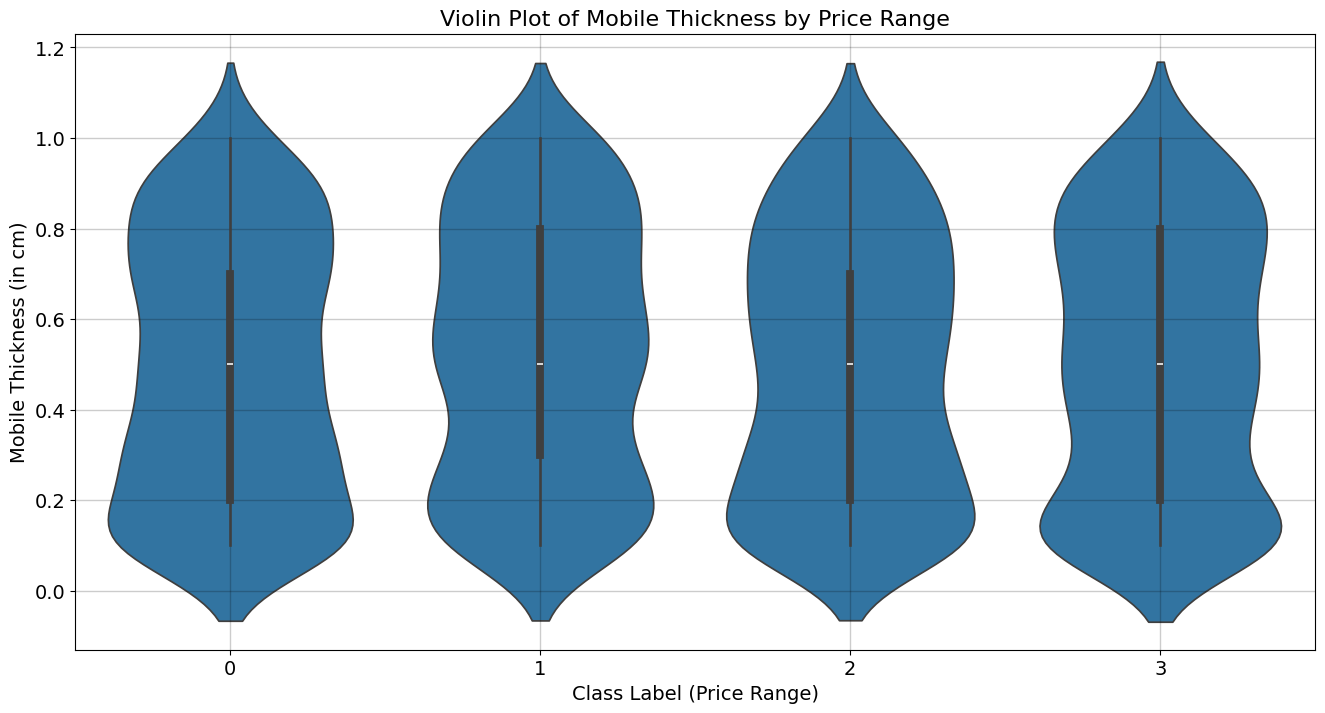

In [58]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='m_dep', data=df)
plt.title('Violin Plot of Mobile Thickness by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Mobile Thickness (in cm)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

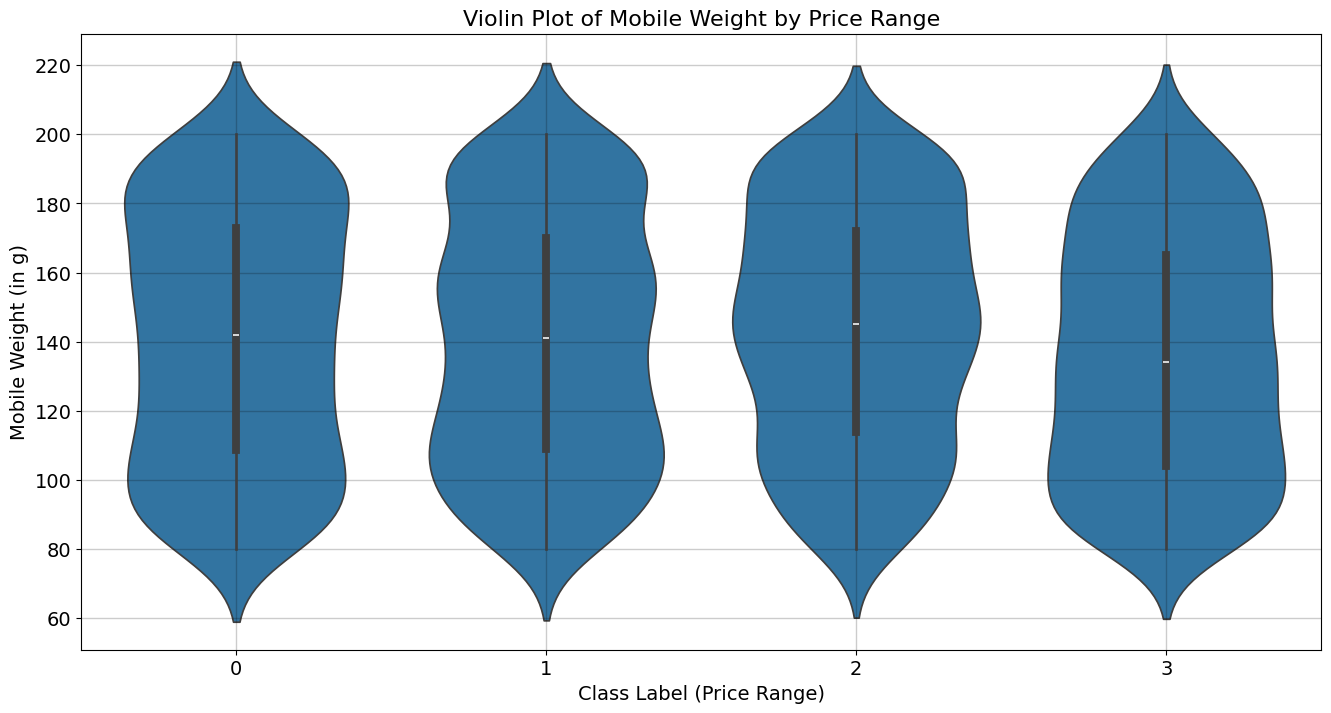

In [59]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='mobile_wt', data=df)
plt.title('Violin Plot of Mobile Weight by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Mobile Weight (in g)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

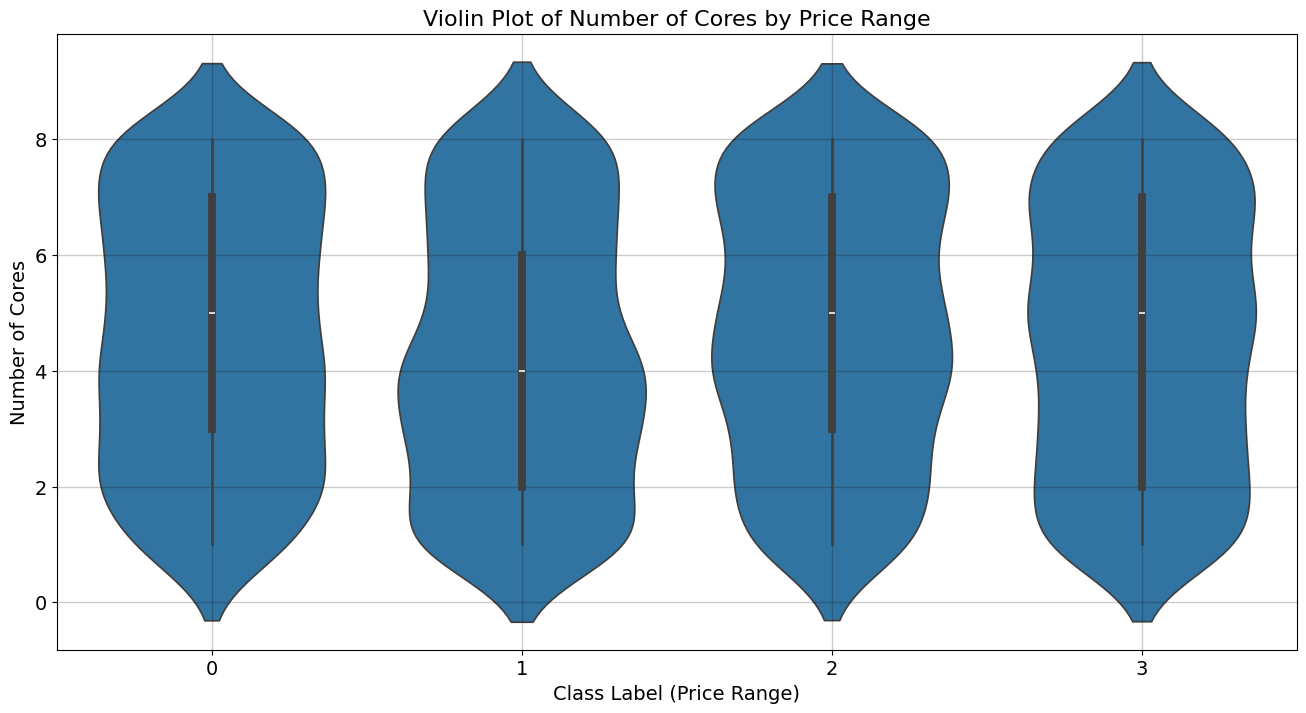

In [60]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='n_cores', data=df)
plt.title('Violin Plot of Number of Cores by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Number of Cores', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

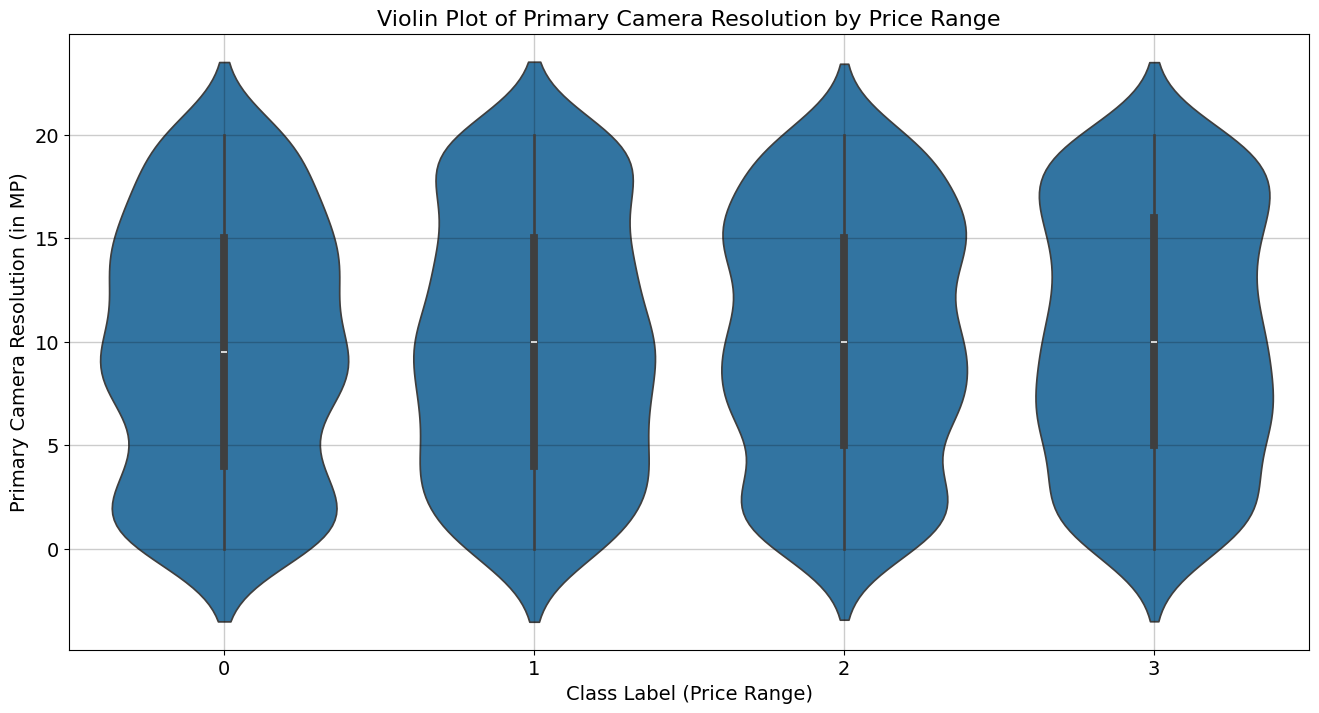

In [61]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='pc', data=df)
plt.title('Violin Plot of Primary Camera Resolution by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Primary Camera Resolution (in MP)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

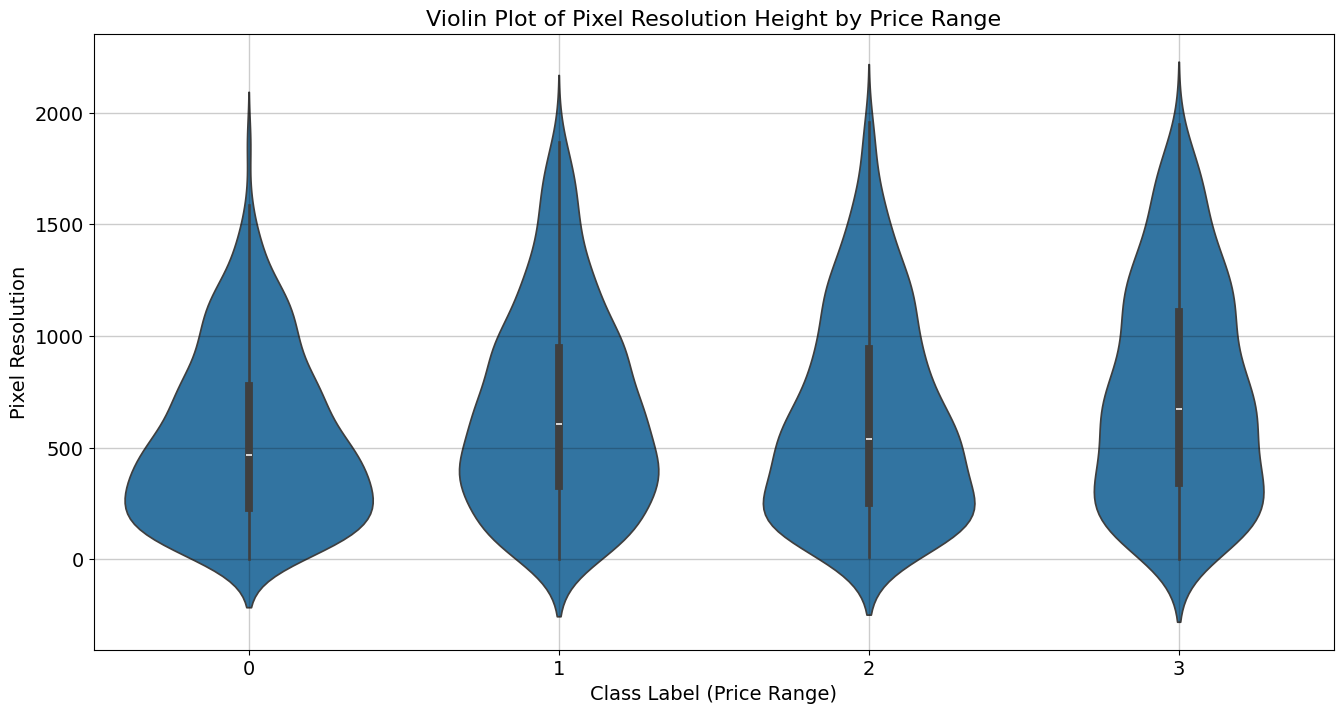

In [62]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='px_height', data=df)
plt.title('Violin Plot of Pixel Resolution Height by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Pixel Resolution', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

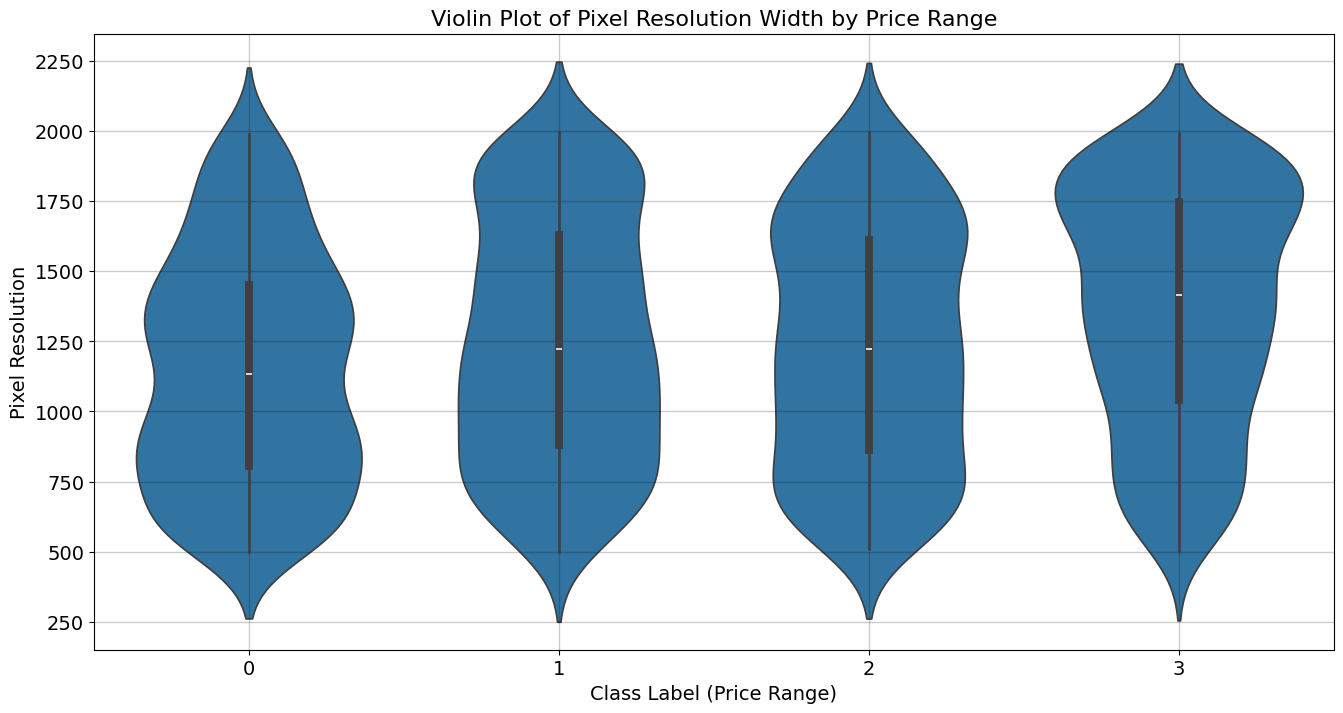

In [63]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='px_width', data=df)
plt.title('Violin Plot of Pixel Resolution Width by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Pixel Resolution', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

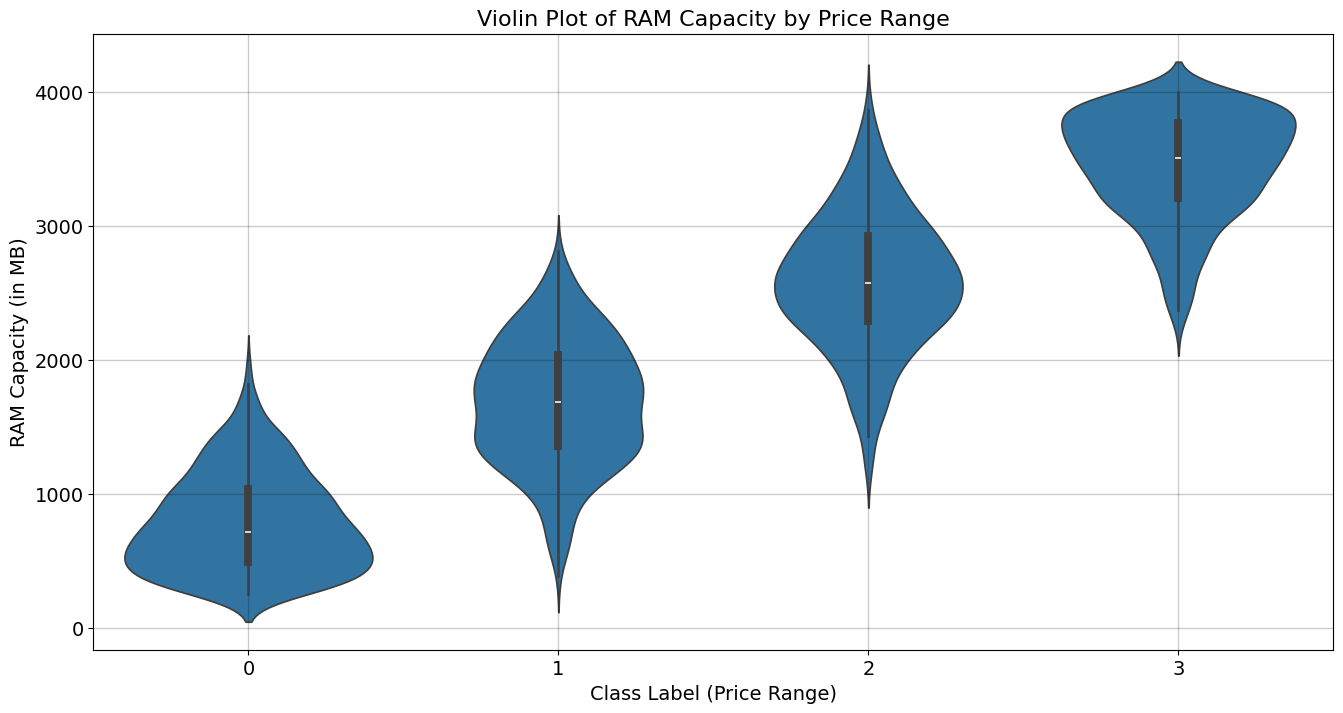

In [64]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='ram', data=df)
plt.title('Violin Plot of RAM Capacity by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('RAM Capacity (in MB)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

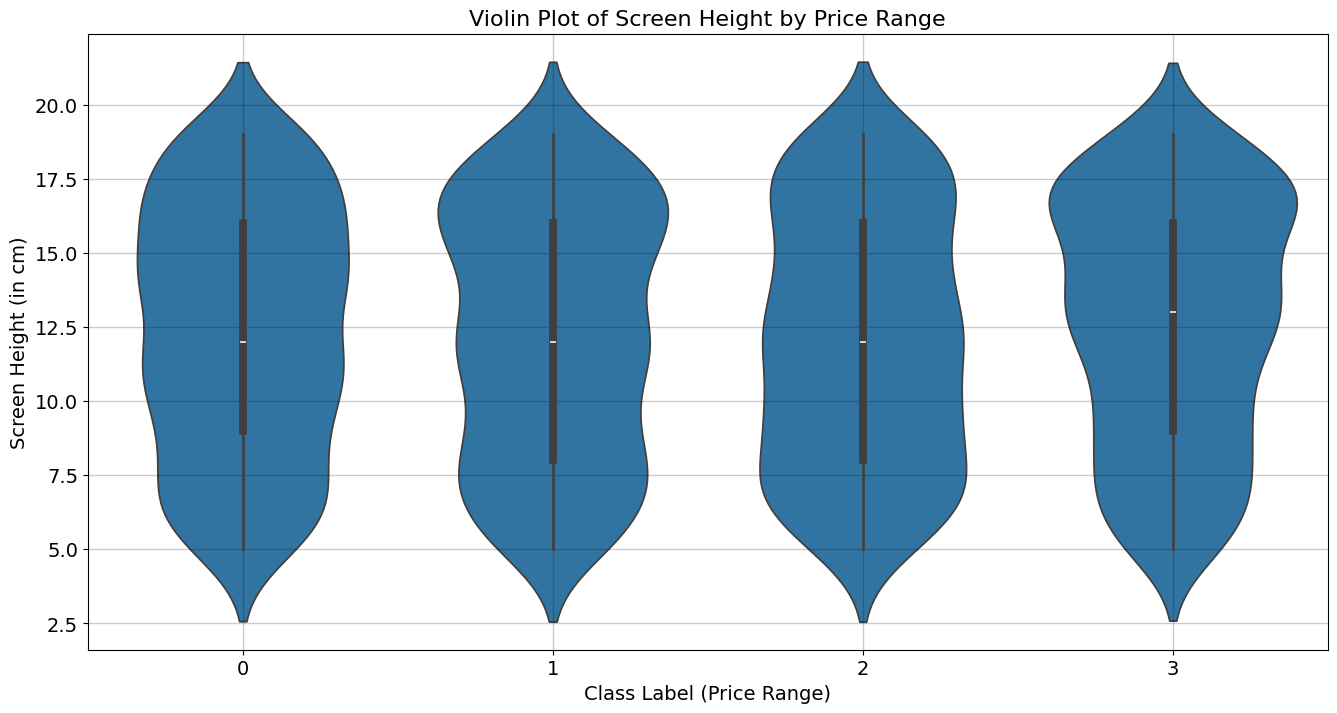

In [65]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='sc_h', data=df)
plt.title('Violin Plot of Screen Height by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Screen Height (in cm)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

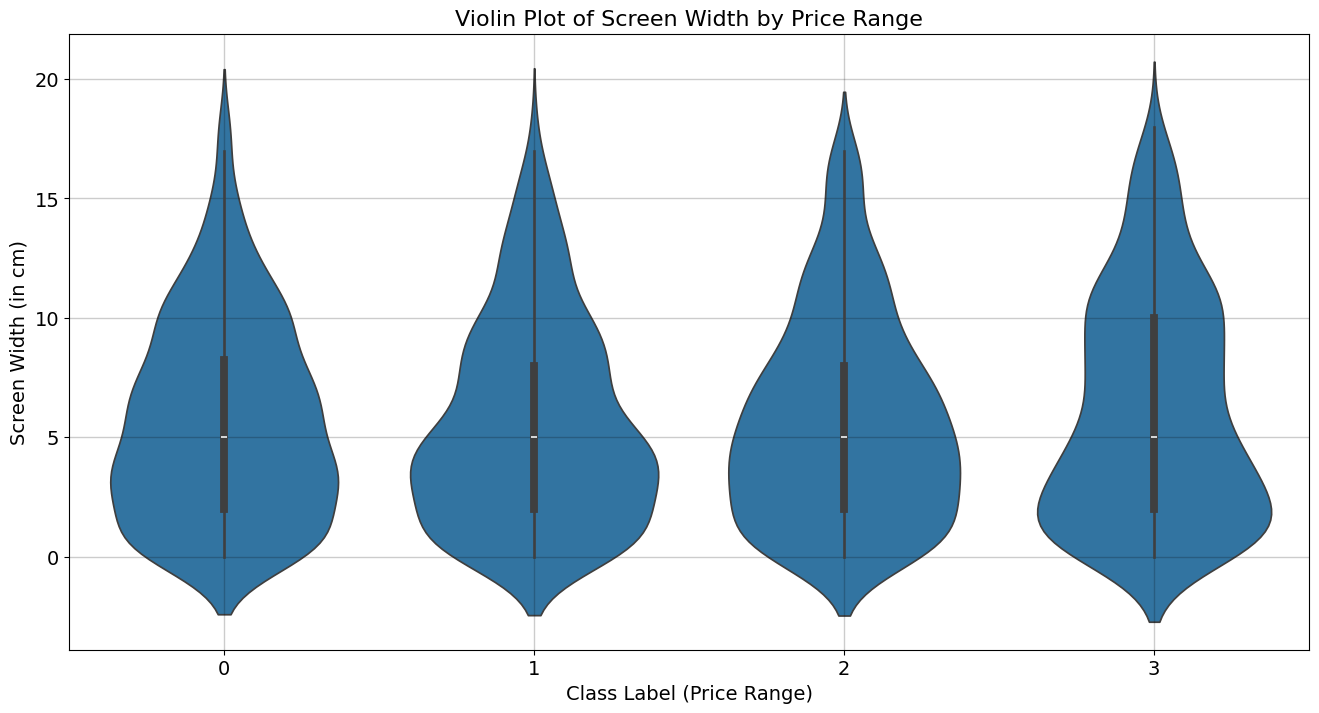

In [66]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='sc_w', data=df)
plt.title('Violin Plot of Screen Width by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Screen Width (in cm)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

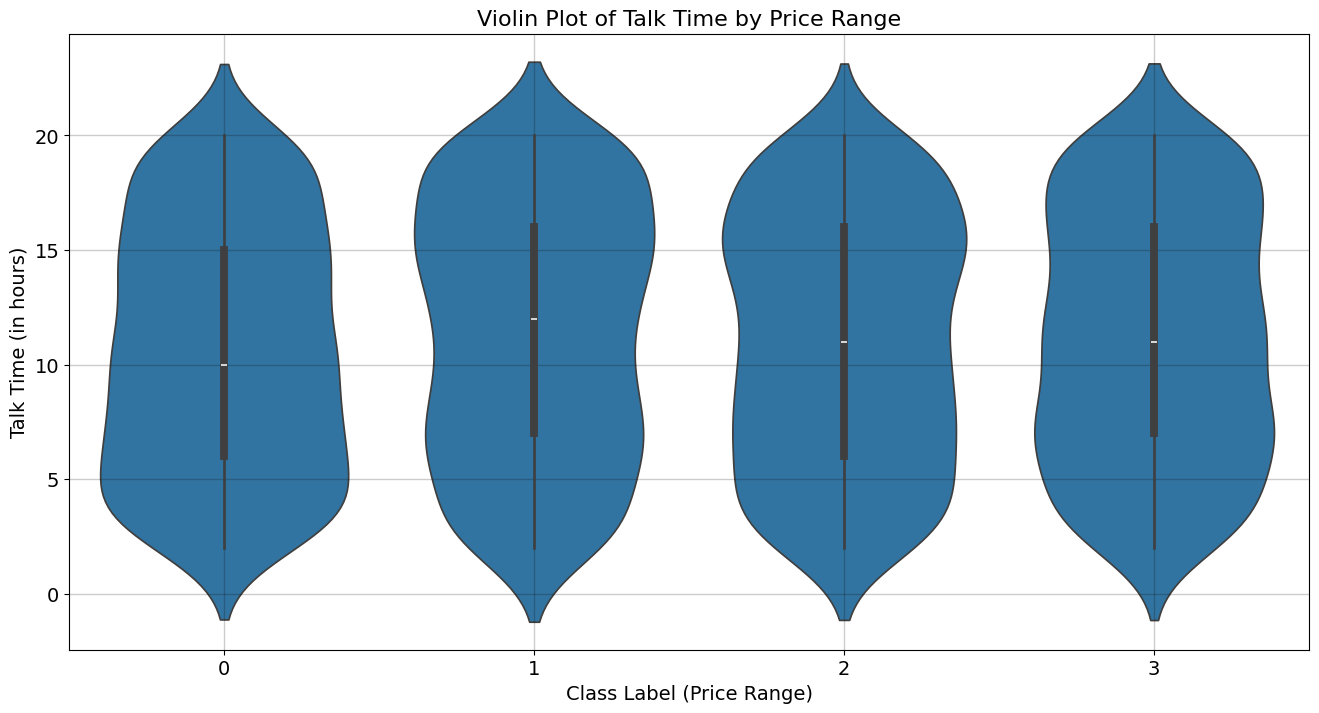

In [67]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='price_range', y='talk_time', data=df)
plt.title('Violin Plot of Talk Time by Price Range', color='black', fontsize=16)
plt.xlabel('Class Label (Price Range)', color='black', fontsize=14)
plt.ylabel('Talk Time (in hours)', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

### Bar Plots for Visualizing Distribution of Data Across Different Classes (Categorical Features)

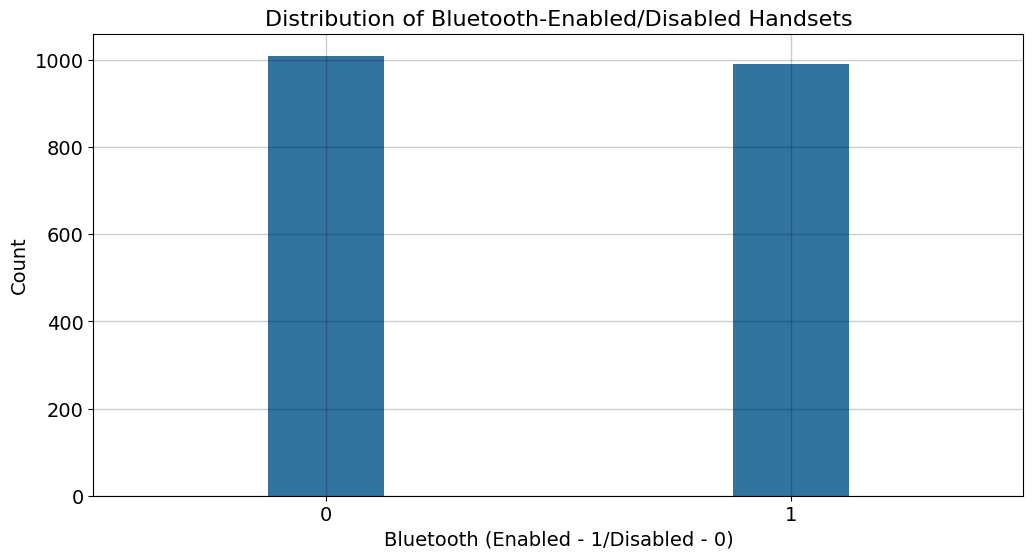

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x='blue', data=df, width=0.25)

plt.title('Distribution of Bluetooth-Enabled/Disabled Handsets', color='black', fontsize=16)
plt.xlabel('Bluetooth (Enabled - 1/Disabled - 0)', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

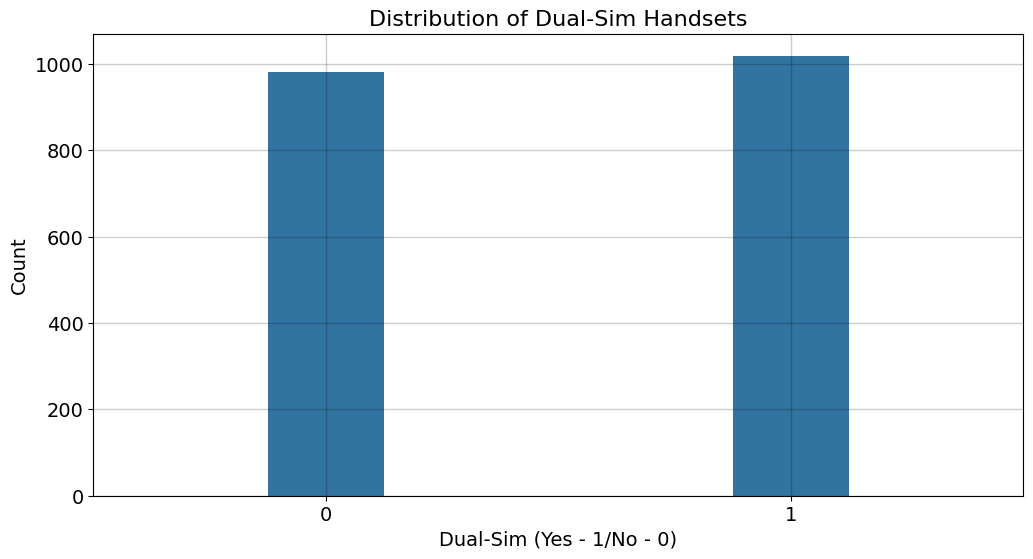

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dual_sim', data=df, width=0.25)

plt.title('Distribution of Dual-Sim Handsets', color='black', fontsize=16)
plt.xlabel('Dual-Sim (Yes - 1/No - 0)', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

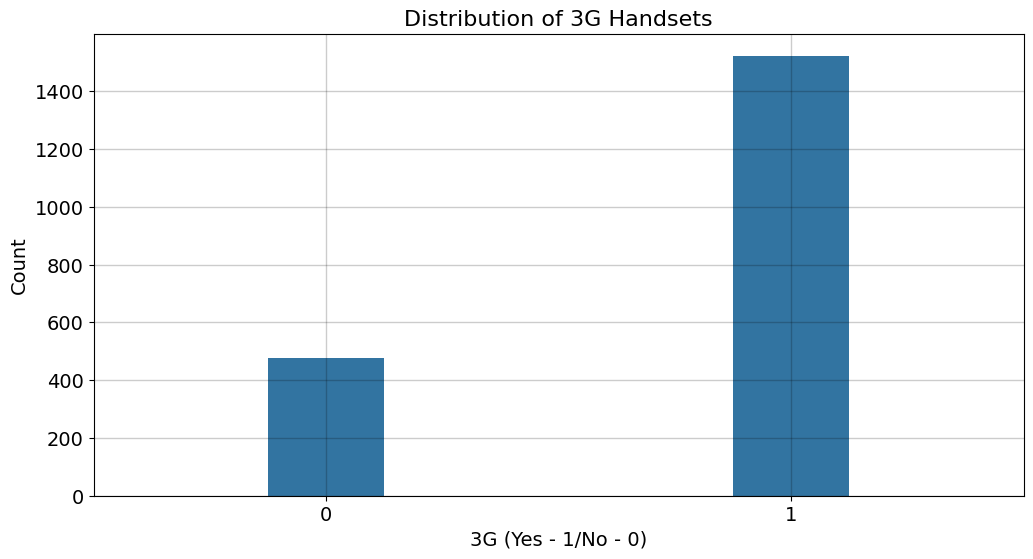

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='three_g', data=df, width=0.25)

plt.title('Distribution of 3G Handsets', color='black', fontsize=16)
plt.xlabel('3G (Yes - 1/No - 0)', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

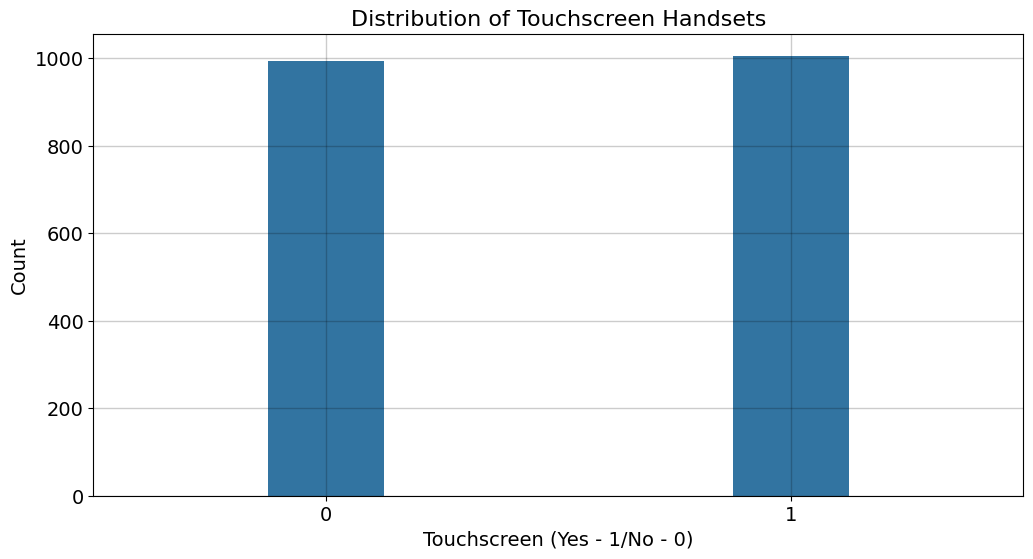

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(x='touch_screen', data=df, width=0.25)

plt.title('Distribution of Touchscreen Handsets', color='black', fontsize=16)
plt.xlabel('Touchscreen (Yes - 1/No - 0)', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

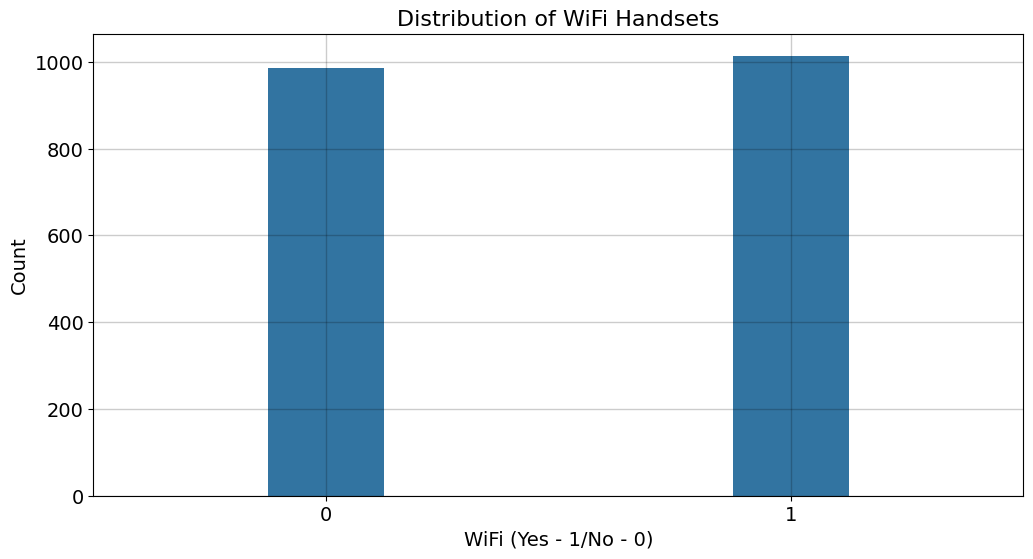

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='wifi', data=df, width=0.25)

plt.title('Distribution of WiFi Handsets', color='black', fontsize=16)
plt.xlabel('WiFi (Yes - 1/No - 0)', color='black', fontsize=14)
plt.ylabel('Count', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

***